# Computer Vision color spaces

### Import statements

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def imshow(img):
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.imshow(rgb_img)
    plt.show()

### To edit an image making a copy of it is always a good idea!

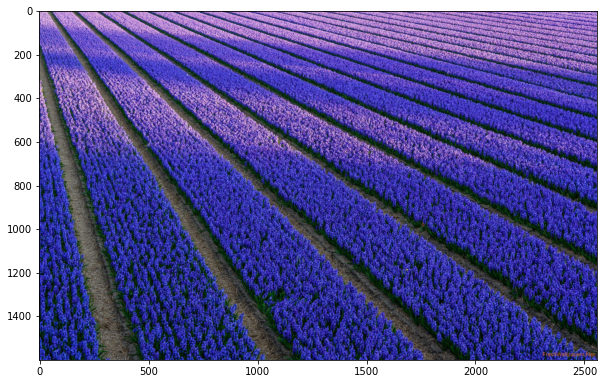

In [21]:
# Load an image
# And make a copy of the original image to avoid manipulating the original image
img = cv2.imread('img/purple-flowers.jpg', 3)
imshow(img)

In [108]:
type(img)

numpy.ndarray

In [9]:
clone = img.copy()

[Hint](# "Numpy .copy function") 

## Color Spaces

### BGR Spliting the color channels

In [10]:
# Load a color image and split in is different B, G and R channels
b, g, r = cv2.split(img)

[Hint](# "cv2.split") 

In [63]:
# Show each channel channel on screen
b += 10
b

array([[201, 225, 237, ..., 222, 235, 234],
       [213, 231, 241, ..., 207, 223, 234],
       [215, 234, 246, ..., 200, 215, 228],
       ...,
       [207, 229, 248, ..., 196, 185, 186],
       [205, 222, 232, ..., 200, 174, 175],
       [193, 210, 210, ..., 191, 177, 178]], dtype=uint8)

#### Merging the color channels

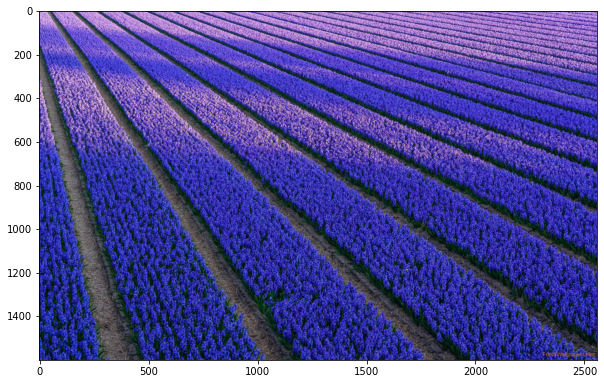

In [71]:
# Modify a channel and then merge them all again
merge_img = cv2.merge((b, g, r))
imshow(merge_img)

[Hint](# "cv2.merge") 

In [66]:
# Create a black canvas with the same size as the image you loaded
img.shape

(1600, 2560, 3)

In [72]:
black_canvas = img.copy()

In [90]:
black_canvas[:2]

array([[[191, 138, 178],
        [215, 163, 203],
        [227, 179, 221],
        ...,
        [212, 127, 171],
        [225, 130, 181],
        [224, 123, 179]],

       [[203, 149, 196],
        [221, 170, 214],
        [231, 182, 228],
        ...,
        [197, 108, 157],
        [213, 119, 174],
        [224, 127, 184]]], dtype=uint8)

In [101]:
black_canvas = np.zeros(black_canvas.shape[:2], dtype = 'uint8')

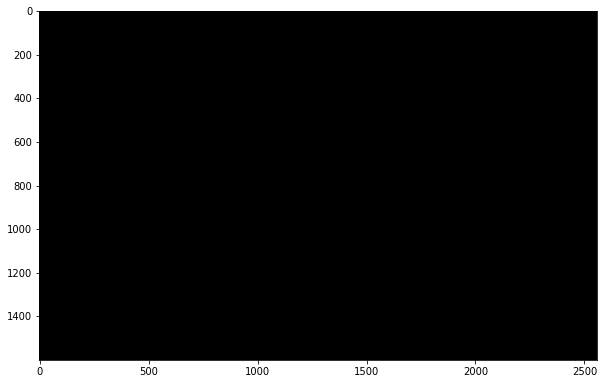

In [102]:
imshow(black_canvas)

[Hint](# "use numpy np.zeros function with the img.shape[:2]") 

In [104]:
# Merge each channel with the black canvas 
# So you will end up with 3 images: (Red,Black,Black), (Black,Green,Black) and (Black,Black,Blue) 
# Assuming you are working with RGB, but BGR is also fine
b_, g_, k = cv2.split(black_canvas)

ValueError: not enough values to unpack (expected 3, got 1)

[Hint](# "cv2.merge") 

### HSV: Hue Saturation Value

#### M&Ms challenge!

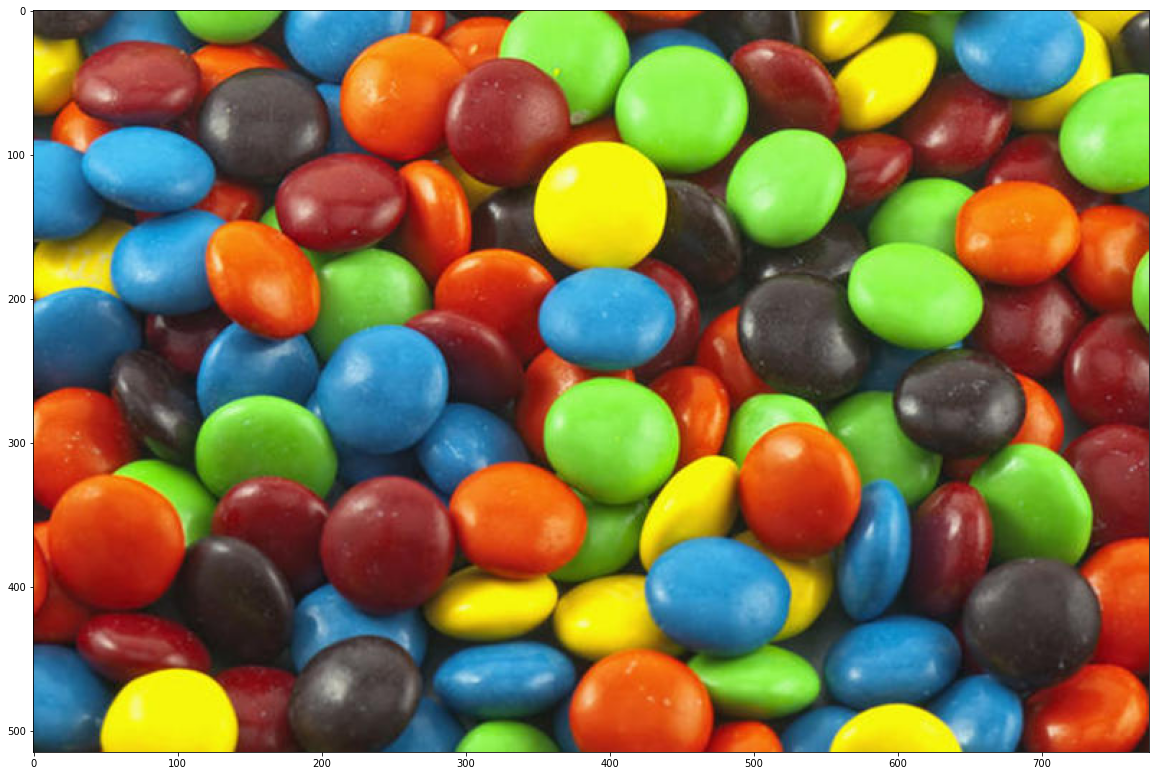

In [134]:
# Use the image below and convert it from BGR to HSV
img = cv2.imread('img/m.jpg')
plt.figure(figsize = (20,15));
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));

In [135]:
# Split the H,S and V channels 
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [136]:
h, s, v = cv2.split(hsv_img)

[Hint](# "cv2.cvtColor") 

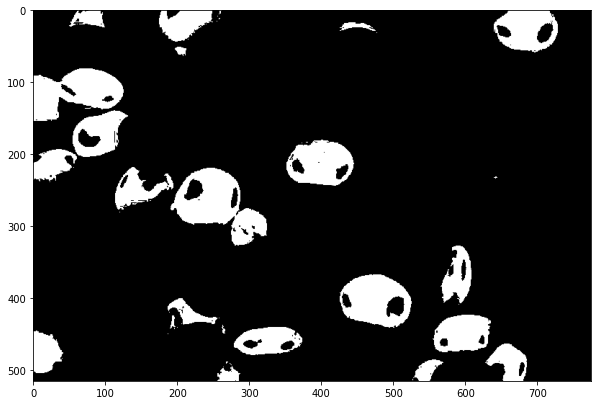

In [137]:
# Create a mask to filter out the Blue M&Ms (remember you need a lower and upper range)
# Make a copy of the hsv image and apply the mask to it, then display the image
lower_blue= np.array([78,158,124])
upper_blue = np.array([138,255,255])

mask = cv2.inRange(hsv_img, lower_blue, upper_blue) #!
imshow(mask)

In [144]:
final = hsv_img + mask

ValueError: operands could not be broadcast together with shapes (515,775,3) (515,775) 

In [138]:
no_blue_img = cv2.bitwise_and(hsv_img, mask)

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-dn5w5exm\opencv\modules\core\src\arithm.cpp:214: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'cv::binary_op'


In [139]:
hsv_img.shape

(515, 775, 3)

In [140]:
mask.shape

(515, 775)

In [141]:
# fg = cv2.bitwise_or(img,img, mask = mask)
# imshow(fg)

In [125]:
# mask = cv2.bitwise_not(mask)
# background = np.full(img.shape, 255, dtype=np.uint8)
# bk = cv2.bitwise_or(background, background, mask=mask)

In [142]:
# final = cv2.bitwise_or(fg, bk)
# imshow(final)

[Hint](# "cv2.inRange") 

In [ ]:
# Repeat the same but now with the greens


In [ ]:
# Now combine both masks togheter so we can see all greens and blues in the same image!


In [ ]:
# Now lets combine both masks but also some opacity, we want to be able to see all M&Ms but
# Blues and greens will show as int he image above while the other colors will be faded out with some opacity
# You just need to add alpha to apply opacity to the dark parts of the mask, then display the image



[Hint](# "cv2.addWeighted") 

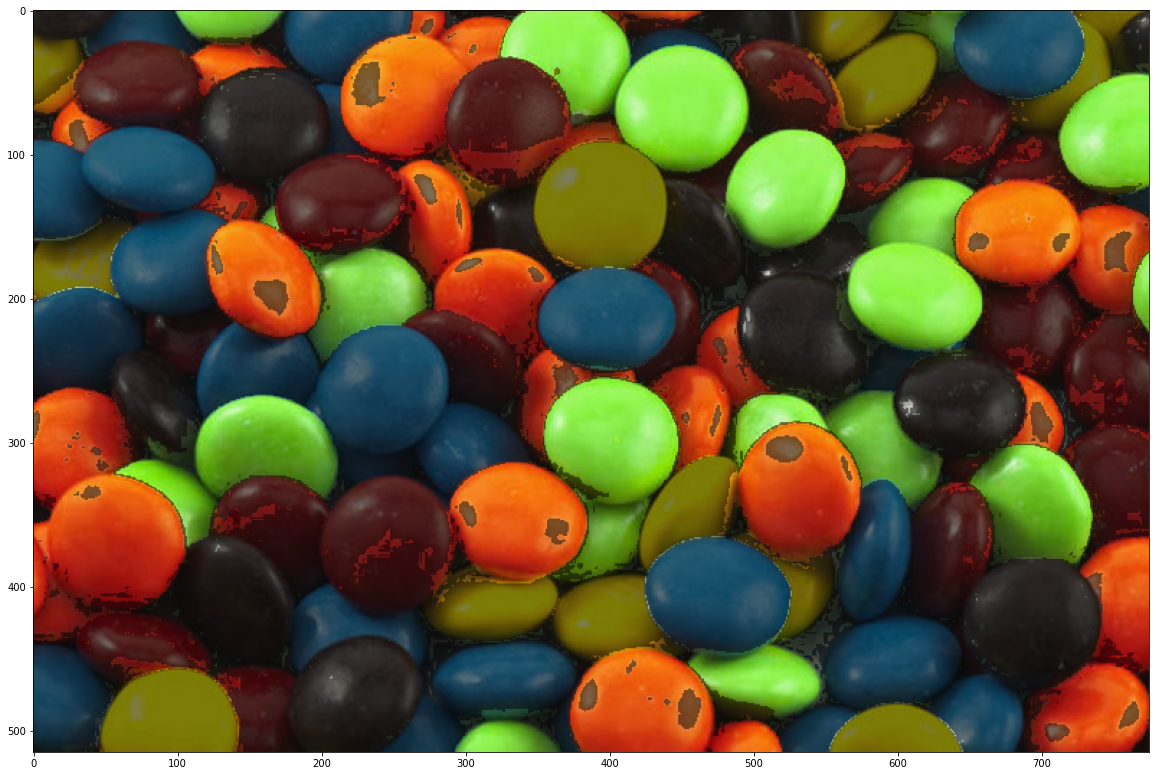

In [9]:
# Below you will find an example with oranges and greens just for reference so you can see what we want to accomplish
# In this example the oranges are not perfect, and it can be improved a lot easily.

## Mini project

### Level 1

#### Ball tracker

1. Given an image with a ball on it isolate the ball

### Level 2

#### Ball tracker

1. Make it track a ball in real time (either with a video or a webcam)

### Level 3

#### Ball Tracker

1. Can you make it track two or more different color balls at the same time?